# Project 6: Image Classification with Deep Learning


## Goals

With my available datasets I want to train a model to accurately identify whether an image is a cat or a dog given cat and dog training data


In [7]:
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'
url2 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'
url3 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'

## Imports


In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Serialize data for quick reads


In [9]:
X = pd.read_pickle(url)
y = np.array(pd.read_pickle(url2))

In [10]:
# Confirm data shapes

print(f"X shape: {X.shape}")

print(f"y shape: {y.shape}")

X shape: (24946, 100, 100, 1)
y shape: (24946,)


In [11]:
# Normalize pixel values
X = X / 255.0

## Take a sample of the data


In [12]:
# Calculate the sample size
sample_size = int(0.5 * len(X))

# Generate random indices
random_indices = np.random.choice(len(X), size=sample_size, replace=False)

# Use the random indices to select samples
X = X[random_indices]
y = y[random_indices]

## Test Splitting


In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Definition


In [ ]:
# Define model
input_shape = X.shape[1:]
inputs = Input(shape=input_shape)

x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(256, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

optimizer = Adam(learning_rate=0.01)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Data augmentation


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2
)

In [22]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=0.00001)

In [17]:
# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=96),
    epochs=20,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20


/usr/local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 22s 267ms/step - accuracy: 0.5046 - loss: 0.6928 - val_accuracy: 0.5571 - val_loss: 0.6764 - learning_rate: 0.0010
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 311ms/step - accuracy: 0.5817 - loss: 0.6750 - val_accuracy: 0.5960 - val_loss: 0.6643 - learning_rate: 0.0010
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 22s 294ms/step - accuracy: 0.6122 - loss: 0.6580 - val_accuracy: 0.5848 - val_loss: 0.6602 - learning_rate: 0.0010
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 18s 240ms/step - accuracy: 0.6434 - loss: 0.6397 - val_accuracy: 0.5796 - val_loss: 0.6674 - learning_rate: 0.0010
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 268ms/step - accuracy: 0.6539 - loss: 0.6223 - val_accuracy: 0.7082 - val_loss: 0.5797 - learning_rate: 0.0010
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 19s 255ms/step - accuracy: 0.6694 - loss: 0.6073 - val_accuracy: 0.7210 - val_loss: 0.5569 - learning_rate: 0.0010
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 22s 285ms/step - accuracy: 0.6909 - loss: 0.5860 - val_

## Evaluate the model


In [18]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8412 - loss: 0.3789
Test accuracy: 0.84


In [19]:
# Make predictions
predictions = model.predict(X_test)

78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


## Plot training and validation accuracy


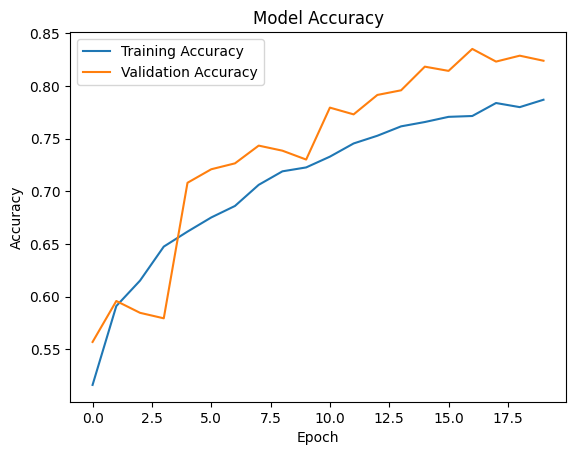

In [20]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Plot training and validation loss


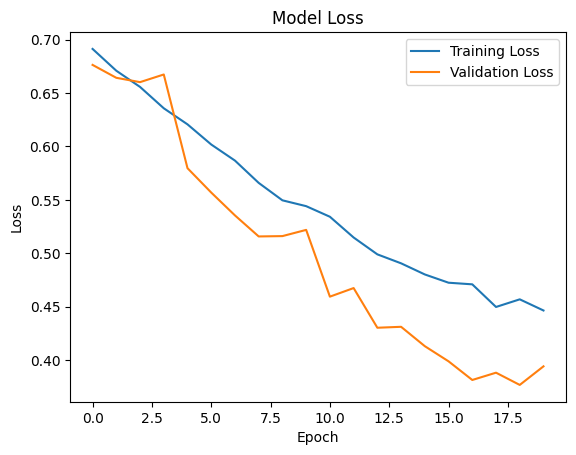

In [21]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()